## Molecular evolution of the influenza virus

The text file **influenza_HA_dna_sequences.fasta** contains the complete DNA sequence of the hemagglutinin (HA) gene of 841 influenza viruses samples collected between 1968 and 2005. Hemagglutinin is a protein that mediates the virus entry into cells and is a target of antibodies produced by the human host that neutralize the virus. To avoid recognition by the immune system, the virus changes its hemagglitinin gene sequence over time. Analyze these sequence data to answer the following questions:

* How do mutations accumulate as a function of time? That is, how does the number of single nucleotide differences between the first sample (A/Aichi/2/1968) and samples from a given year vary as a function of time? Make the graph.

* What fraction of the HA gene has changed as a function of time?

* What is the genetic variation (average pairwise distance) between the strains from the same year?

* How long would we have to wait for the population to accumulate the same number of genetic differences that typically separate co-circulating strains?

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()

In [4]:
class Influenza:
    year: int
    gene_code: str

    def __init__(self, year: int, gene_code: str):
        self.year = year
        self.gene_code = gene_code


In [5]:
data: list[Influenza] = []

with open('influenza_HA_dna_sequences.fasta', 'r') as f:
    lines = f.readlines()
    for i in range(0, len(lines) // 2, 2):
        description: str = lines[i]
        gene_code: str = lines[i + 1]
        year: int = int(description.split("/")[-1])

        data.append(Influenza(year, gene_code))

In [6]:
def count_base_difference(self: Influenza, other: Influenza) -> int:
    """
    Count the amount of base differences
    :param self: First gene code
    :param other: Second gene code
    :return: Amount of base differences
    """
    amount_differences: int = 0
    for s, o in zip(self.gene_code, other.gene_code):
        if s != o:
            amount_differences += 1
    return amount_differences

In [7]:
Influenza_1968 = None
min_year: int = 1968
max_year: int = 1968
for I in data:
    if I.year == 1968:
        Influenza_1968 = I

    if I.year > max_year:
        max_year = I.year

/usr/local/anaconda3/envs/base_enviroment/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/envs/base_enviroment/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/envs/base_enviroment/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/envs/base_enviroment/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

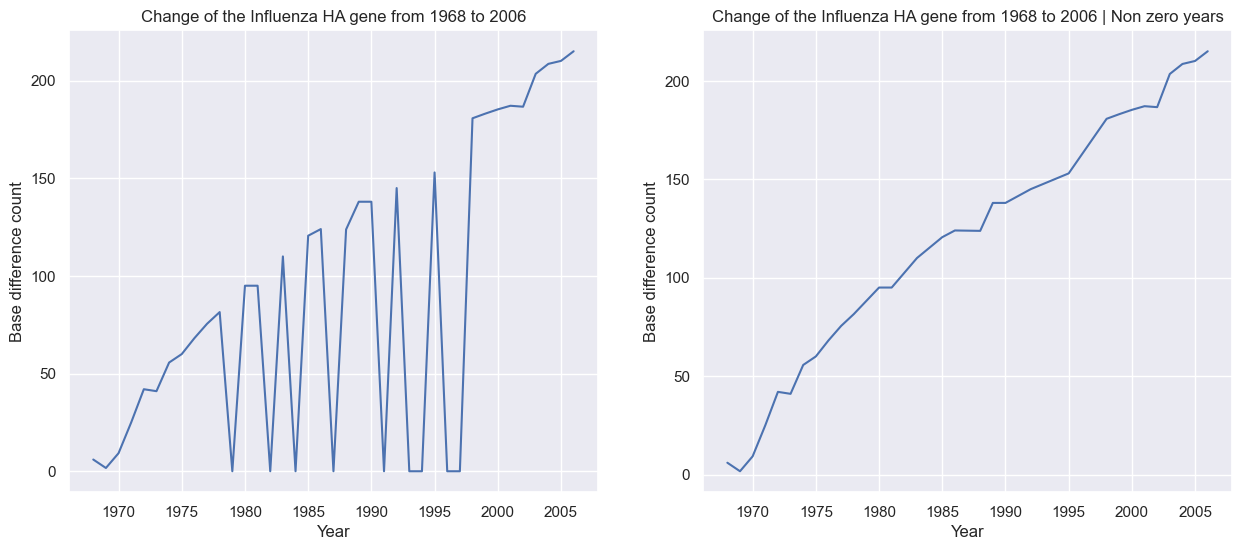

In [8]:
# 1.
differences: list[int] = [0] * (max_year - min_year + 1)
counts: list[int] = [0] * (max_year - min_year + 1)
for I in data:
    differences[I.year - min_year] += count_base_difference(Influenza_1968, I)
    counts[I.year - min_year] += 1

for i in range(len(counts)):
    if counts[i] > 1:
        differences[i] /= counts[i]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.lineplot(x=range(min_year, max_year + 1), y=differences, ax=ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("Base difference count")
ax1.set_title("Change of the Influenza HA gene from 1968 to 2006")

not_null_differences = np.array([d for d in differences if d != 0])
not_null_years = np.array([min_year + i for i in range(len(differences)) if differences[i] != 0])
sns.lineplot(x=not_null_years, y=not_null_differences, ax=ax2)
ax2.set_xlabel("Year")
ax2.set_ylabel("Base difference count")
ax2.set_title("Change of the Influenza HA gene from 1968 to 2006 | Non zero years")
plt.show()

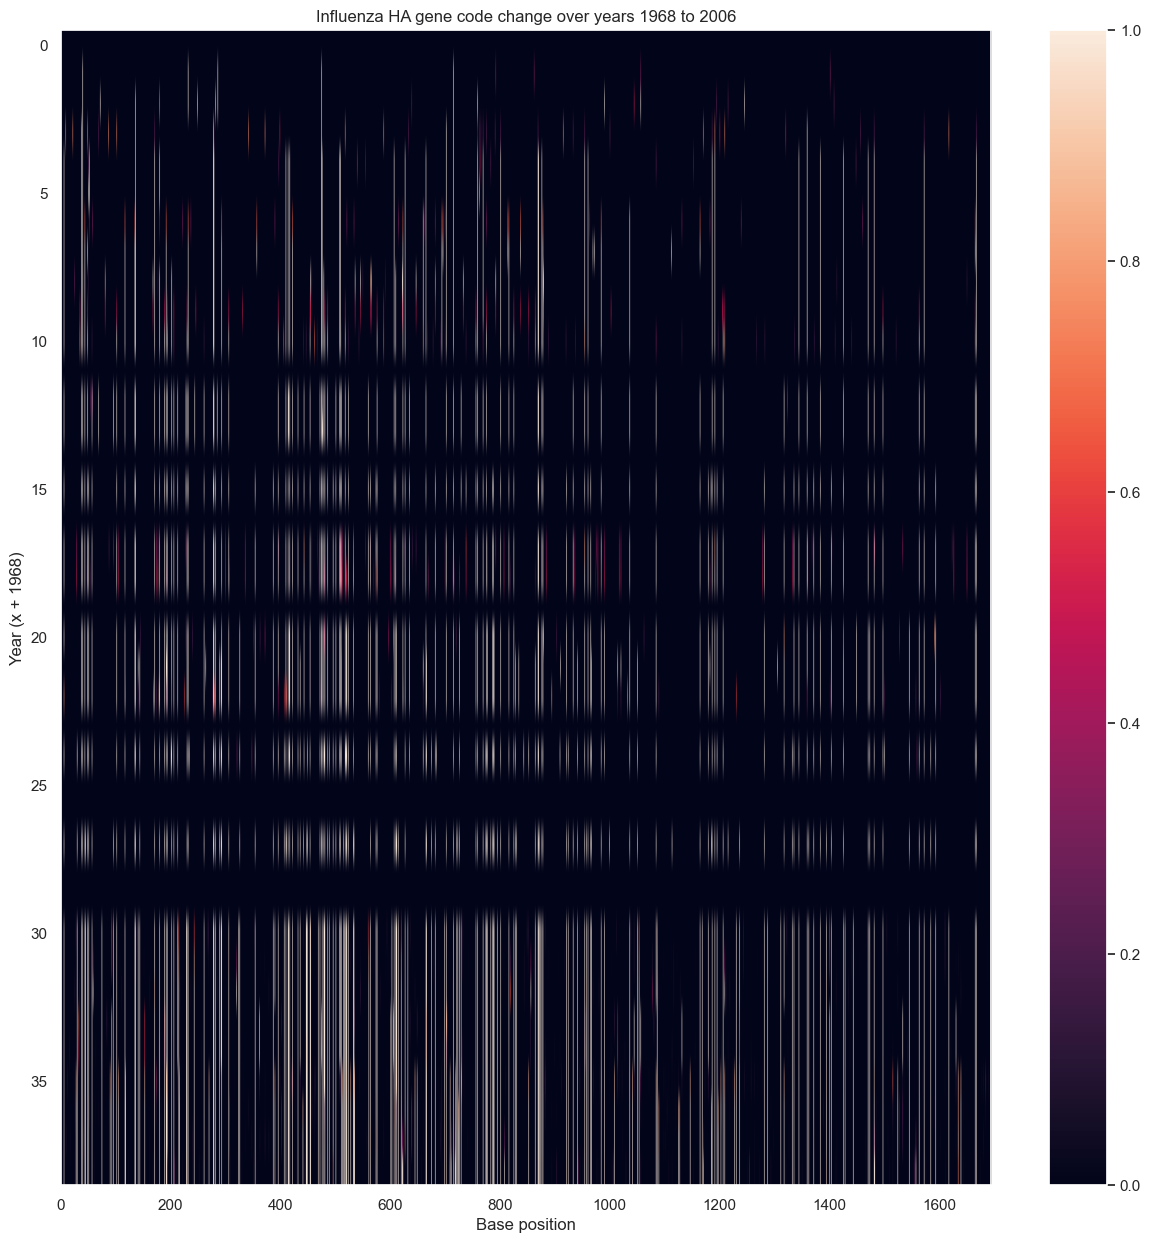

In [34]:
# 2.
data.sort(key=lambda I: I.year)

counts: list[int] = [0] * (max_year - min_year + 1)
for I in data:
    counts[I.year - min_year] += 1

change_counts_year: np.array = np.zeros((int(max_year - min_year + 1), len(Influenza_1968.gene_code)))
for i in range(len(data)):
    if data[i].year == min_year:
        continue

    for j in range(len(Influenza_1968.gene_code)):
        if data[i].gene_code[j] != data[0].gene_code[j]:
            change_counts_year[data[i].year - min_year, j] += 1

for i in range(len(counts)):
    if counts[i] > 1:
        change_counts_year[i] /= counts[i]

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
img = ax.imshow(change_counts_year, aspect="auto")
fig.colorbar(img, ax=ax)
ax.grid(False)
ax.set_ylabel("Year (x + 1968)")
ax.set_xlabel("Base position")
ax.set_title("Influenza HA gene code change over years 1968 to 2006")
plt.show()

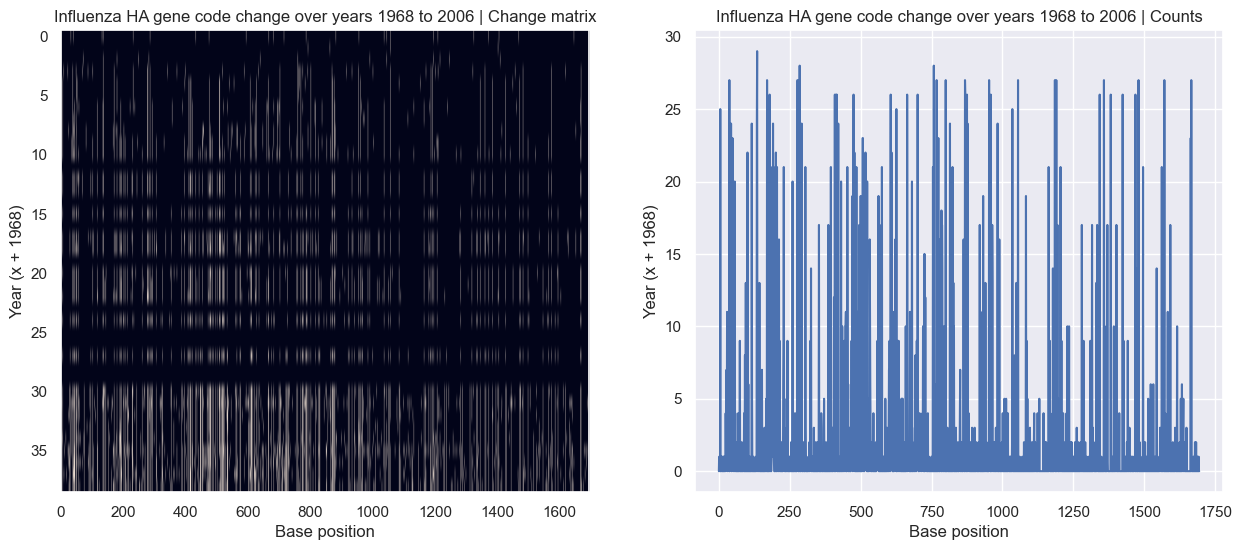

In [36]:
# 2.

position_matrix = np.zeros((max_year - min_year + 1, len(Influenza_1968.gene_code)))

for d in data:
    for i, (s, o) in enumerate(zip(Influenza_1968.gene_code, d.gene_code)):
        if s != o:
            position_matrix[d.year - min_year, i] = 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.grid(False)
ax1.imshow(position_matrix, aspect="auto")
ax1.set_ylabel("Year (x + 1968)")
ax1.set_xlabel("Base position")
ax1.set_title("Influenza HA gene code change over years 1968 to 2006 | Change matrix")

counts = np.sum(position_matrix, axis=0)
ax2.plot(counts)
ax2.set_ylabel("Year (x + 1968)")
ax2.set_xlabel("Base position")
ax2.set_title("Influenza HA gene code change over years 1968 to 2006 | Counts")
plt.show()

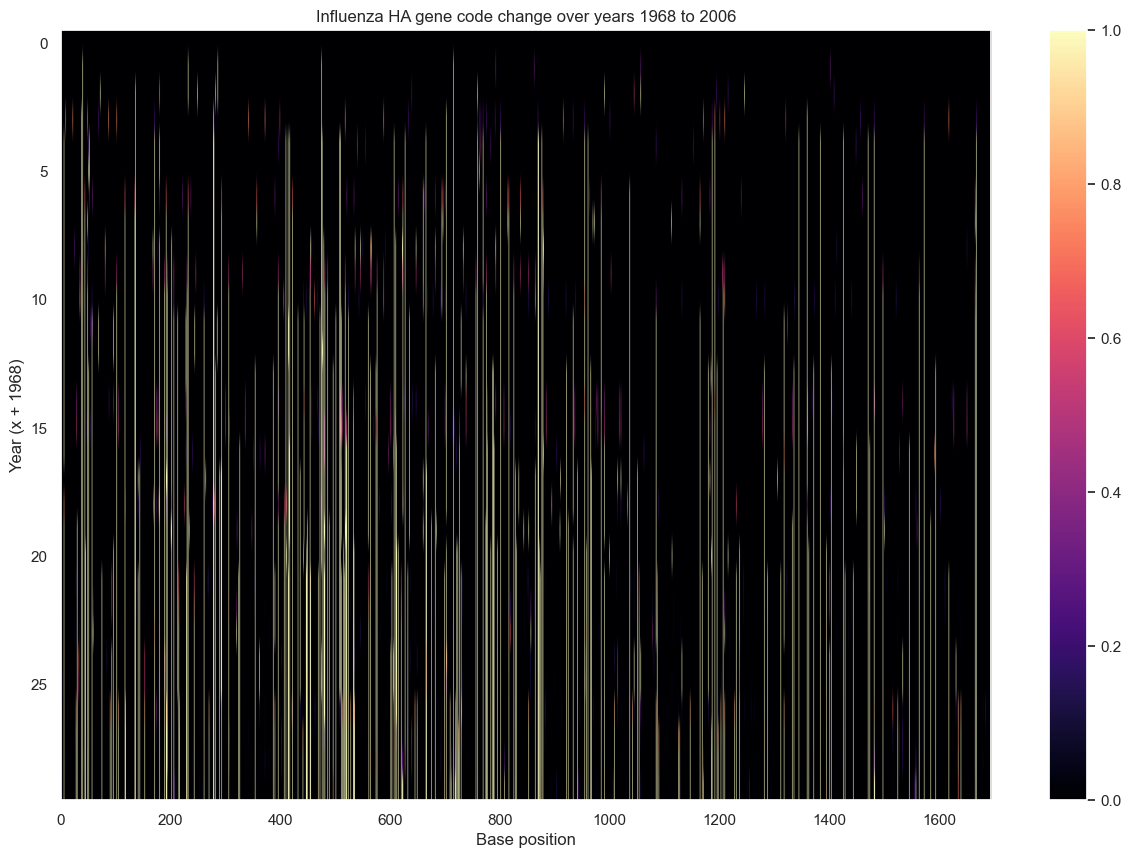

In [43]:
# 2.
data.sort(key=lambda I: I.year)

counts: list[int] = [0] * (max_year - min_year + 1)
for I in data:
    counts[I.year - min_year] += 1

change_counts_year: np.array = np.zeros((int(max_year - min_year + 1), len(Influenza_1968.gene_code)))
for i in range(len(data)):
    if data[i].year == min_year:
        continue

    for j in range(len(Influenza_1968.gene_code)):
        if data[i].gene_code[j] != data[0].gene_code[j]:
            change_counts_year[data[i].year - min_year, j] += 1

for i in range(len(counts)):
    if counts[i] > 1:
        change_counts_year[i] /= counts[i]

non_null_counts = np.array([change_counts_year[i] for i in range(len(counts)) if counts[i] != 0])
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
img = ax.imshow(non_null_counts, aspect="auto", cmap="magma")
fig.colorbar(img, ax=ax)
ax.grid(False)
ax.set_ylabel("Year (x + 1968)")
ax.set_xlabel("Base position")
ax.set_title("Influenza HA gene code change over years 1968 to 2006")
plt.show()

/usr/local/anaconda3/envs/base_enviroment/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/envs/base_enviroment/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


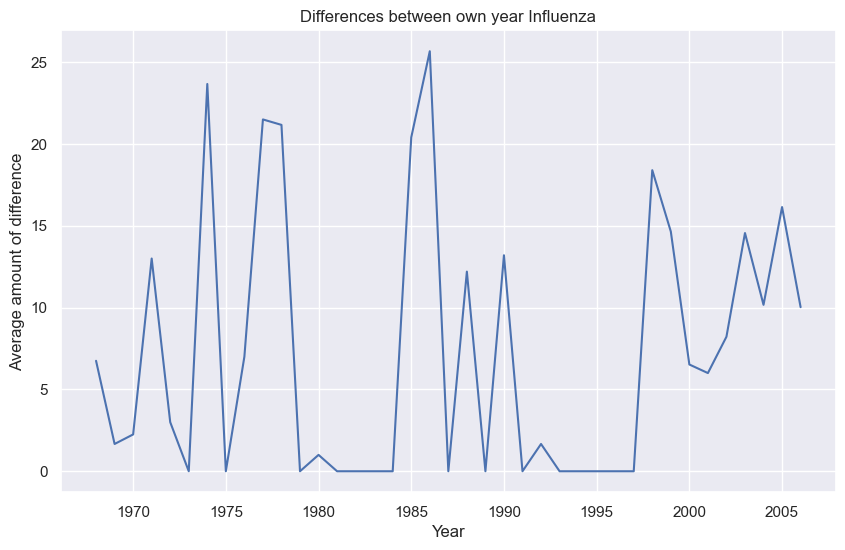

In [33]:
# 3.
years: list[list[Influenza]] = []
for i in range(max_year - min_year + 1):
    years.append([])

for d in data:
    years[d.year - min_year].append(d)

averages: list[float] = []
for year_i in years:
    differences: int = 0
    for j in range(1, len(year_i)):
        differences += count_base_difference(year_i[0], year_i[j])
    if len(year_i) != 0:
        averages.append(differences / len(year_i))
    else:
        averages.append(0)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(x=range(min_year, max_year + 1), y=averages, ax=ax)
ax.set_title("Differences between own year Influenza")
ax.set_xlabel("Year")
ax.set_ylabel("Average amount of difference")
plt.show()